In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [2]:
gold = pd.read_csv('../data/raw/gold_data.csv')
sp500 = pd.read_csv('../data/raw/sp500.csv')

In [3]:
gold.head(3)

,Date,Close,High,Low,Open,Volume
0,28/09/2020,1872.800049,1872.800049,1872.800049,1872.800049,10455
1,29/09/2020,1894.300049,1895.400024,1872.400024,1876.500000,3283
2,30/09/2020,1887.500000,1899.699951,1879.800049,1893.000000,600


In [4]:
sp500.head(3)

,Date,Close,High,Low,Open,Volume
0,02/01/2020,3257.850098,3258.139893,3235.530029,3244.669922,3459930000
1,03/01/2020,3234.850098,3246.149902,3222.340088,3226.360107,3484700000
2,06/01/2020,3246.280029,3246.840088,3214.639893,3217.550049,3702460000


In [5]:
gold['Date'] = pd.to_datetime(gold['Date'], format='%d/%m/%Y')
sp500['Date'] = pd.to_datetime(sp500['Date'], format='%d/%m/%Y')

In [6]:
gold['Date'].min(), gold['Date'].max(), sp500['Date'].min(), sp500['Date'].max()

(Timestamp('2020-09-28 00:00:00'),
 Timestamp('2025-09-25 00:00:00'),
 Timestamp('2020-01-02 00:00:00'),
 Timestamp('2025-09-24 00:00:00'))

In [7]:
# Merge datasets for correlation analysis
df = pd.merge(gold, sp500, on='Date', suffixes=('_gold', '_sp500'))
df.head(3)

,Date,Close_gold,High_gold,Low_gold,Open_gold,Volume_gold,Close_sp500,High_sp500,Low_sp500,Open_sp500,Volume_sp500
0,2020-09-28,1872.800049,1872.800049,1872.800049,1872.800049,10455,3351.600098,3360.739990,3332.909912,3333.899902,3950910000
1,2020-09-29,1894.300049,1895.400024,1872.400024,1876.500000,3283,3335.469971,3357.919922,3327.540039,3350.919922,3661590000
2,2020-09-30,1887.500000,1899.699951,1879.800049,1893.000000,600,3363.000000,3393.560059,3340.469971,3341.209961,4738640000


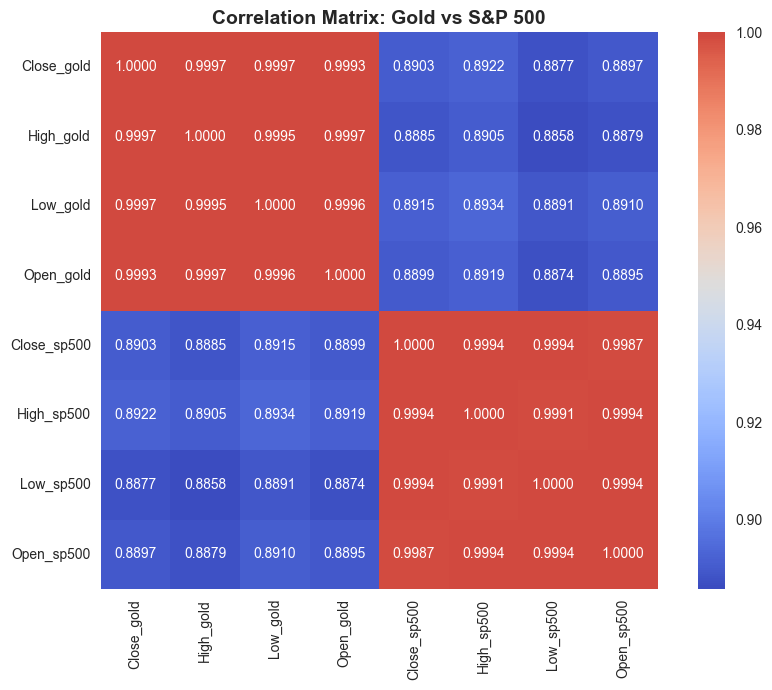

In [8]:
correlation_matrix = df.loc[:, ~df.columns.isin(['Date', 'Volume_gold', 'Volume_sp500'])].corr()

# Create heatmap
plt.figure(figsize=(9, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=.948, fmt='.4f', square=True)
plt.title('Correlation Matrix: Gold vs S&P 500', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

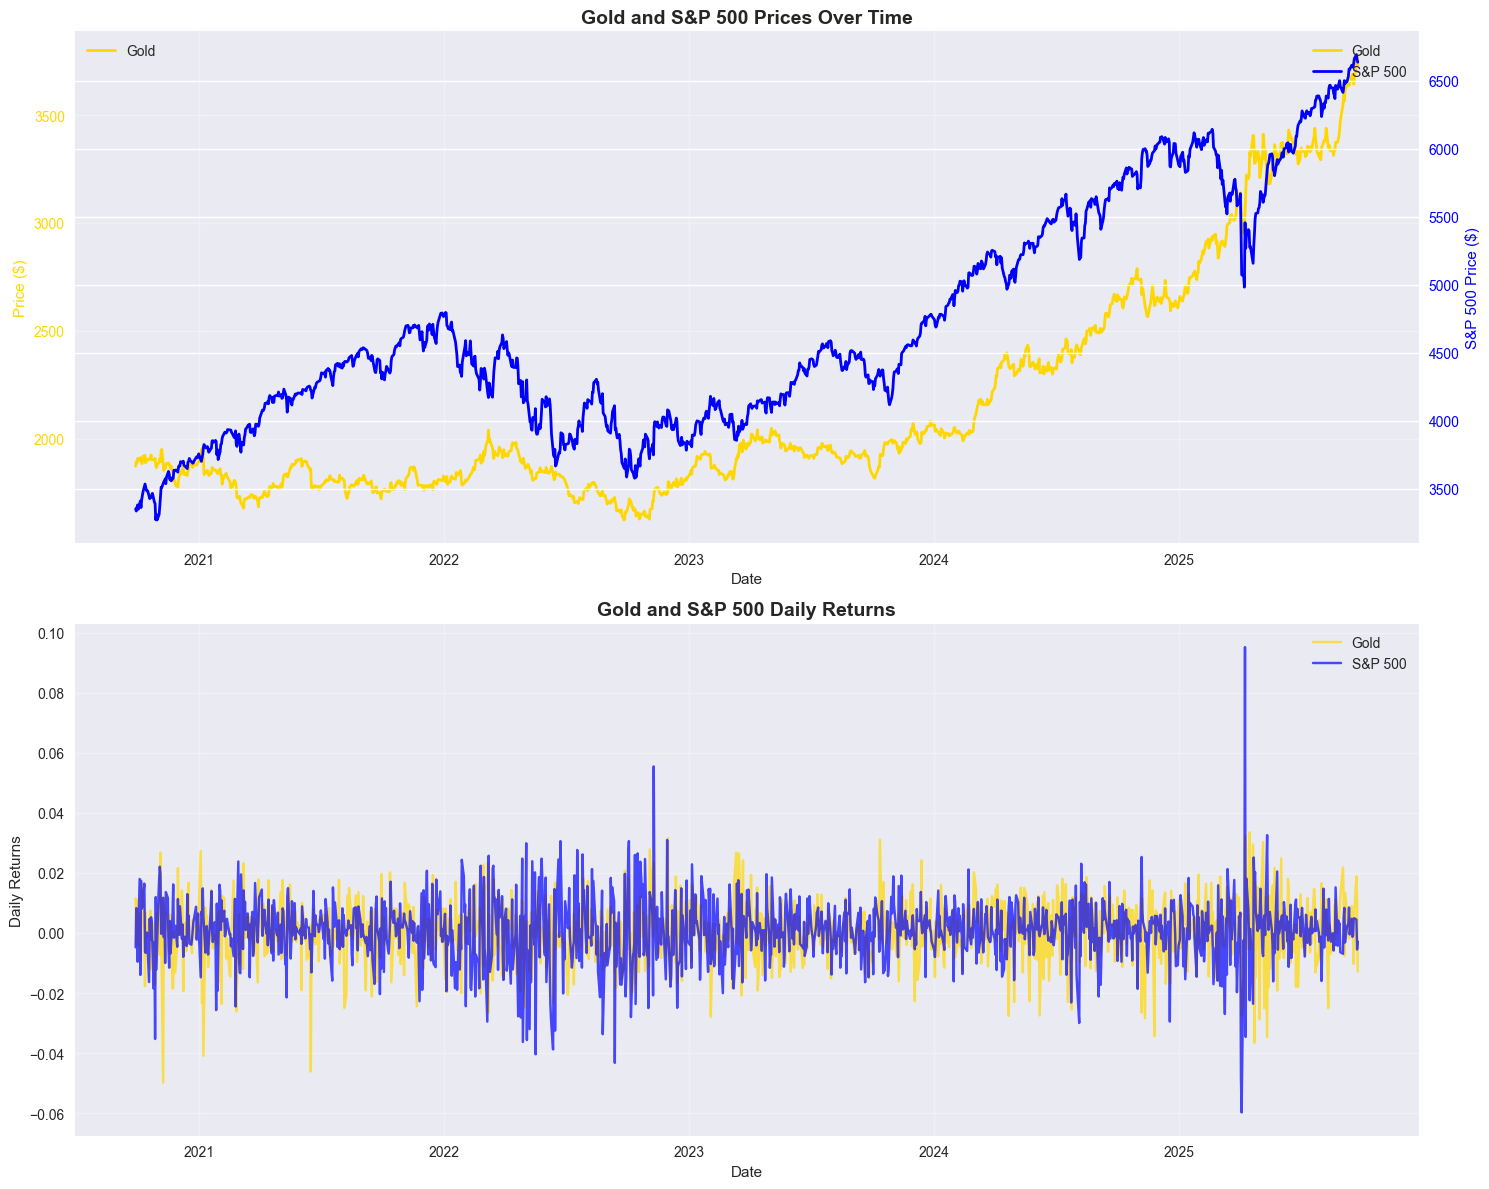

<Figure size 800x550 with 0 Axes>

In [9]:
fig, axes = plt.subplots(2, 1, figsize=(15, 12))
axes = axes.flatten()

# Gold (left axis)
ax1 = axes[0]
ax1.plot(df['Date'], df['Close_gold'], color='gold', linewidth=2, label='Gold')
ax1.set_ylabel('Gold Price ($)', color='gold')
ax1.tick_params(axis='y', labelcolor='gold')

# S&P 500 (right axis) 
ax2 = ax1.twinx()
ax2.plot(df['Date'], df['Close_sp500'], color='blue', linewidth=2, label='S&P 500')
ax2.set_ylabel('S&P 500 Price ($)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Add both lines to legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

# Design
axes[0].set_title('Gold and S&P 500 Prices Over Time', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Price ($)')
axes[0].grid(True, alpha=0.3)
axes[0].legend(['Gold', 'S&P 500'])
axes[1].grid(True, alpha=0.3)

# Returns
df['Gold_Returns'] = df['Close_gold'].pct_change()
df['SP500_Returns'] = df['Close_sp500'].pct_change()

axes[1].plot(df['Date'], df['Gold_Returns'], color='gold', alpha=0.7)
axes[1].plot(df['Date'], df['SP500_Returns'], color='blue', alpha=0.7)
#Design

axes[1].set_title('Gold and S&P 500 Daily Returns', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Daily Returns')
axes[1].legend(['Gold', 'S&P 500'])
axes[1].grid(True, alpha=0.3)



axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Add statistics as text annotations
stats_text = (
    f"Gold Range: ${df['Close_gold'].min():.2f} - ${df['Close_gold'].max():.2f}\n"
    f"S&P 500 Range: ${df['Close_sp500'].min():.2f} - ${df['Close_sp500'].max():.2f}\n\n"
    f"Gold volatility (std): {df['Gold_Returns'].std():.4f} ({df['Gold_Returns'].std()*100:.2f}%)\n"
    f"S&P 500 volatility (std): {df['SP500_Returns'].std():.4f} ({df['SP500_Returns'].std()*100:.2f}%)"
)

# Add text box to figure
plt.gcf().text(0.02, -0.1, stats_text, fontsize=10, fontfamily='monospace', 
               bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', pad=10))
plt.subplots_adjust(bottom=0.3)  # Make room for the text


In [13]:
print(df.dtypes)
print(df.head())


Date             datetime64[ns]
Close_gold              float64
High_gold               float64
Low_gold                float64
Open_gold               float64
Volume_gold               int64
Close_sp500             float64
High_sp500              float64
Low_sp500               float64
Open_sp500              float64
Volume_sp500              int64
Gold_Returns            float64
SP500_Returns           float64
dtype: object
        Date   Close_gold    High_gold     Low_gold    Open_gold  Volume_gold  \
0 2020-09-28  1872.800049  1872.800049  1872.800049  1872.800049        10455   
1 2020-09-29  1894.300049  1895.400024  1872.400024  1876.500000         3283   
2 2020-09-30  1887.500000  1899.699951  1879.800049  1893.000000          600   
3 2020-10-01  1908.400024  1909.599976  1882.500000  1884.099976          730   
4 2020-10-02  1900.199951  1913.000000  1893.900024  1893.900024          530   

   Close_sp500   High_sp500    Low_sp500   Open_sp500  Volume_sp500  \
0  3351.6000

In [17]:
data_prices = df[["Close_gold", "Close_sp500"]].copy()

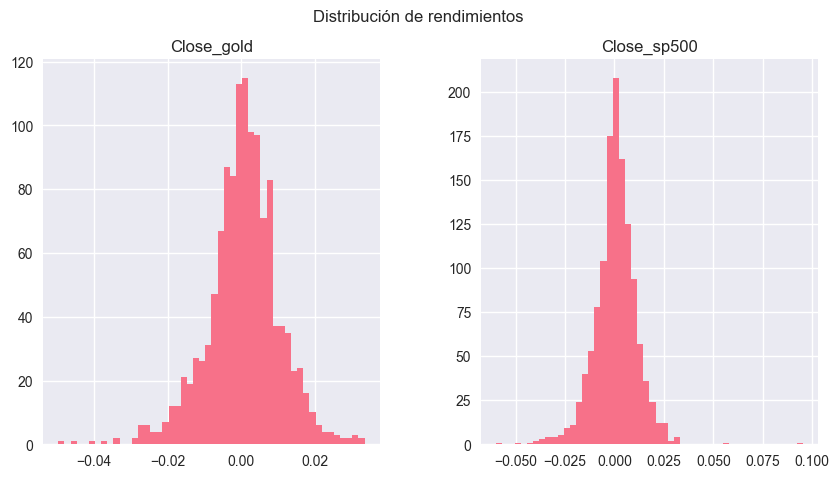

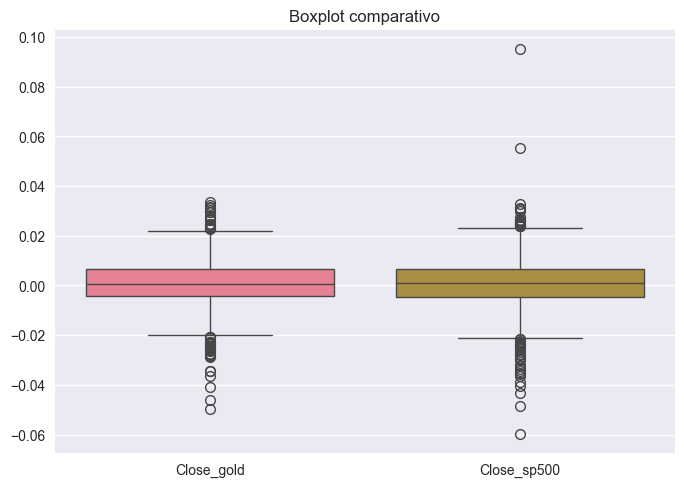

In [19]:
returns = data_prices.pct_change().dropna()

# Histogramas
returns.hist(bins=50, figsize=(10,5))
plt.suptitle("Distribución de rendimientos")
plt.show()

# Boxplot para comparar
sns.boxplot(data=returns)
plt.title("Boxplot comparativo")
plt.show()

In [20]:
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
df_num = df[numeric_cols].copy()

In [28]:
print(df_num.describe().T)

                count          mean           std          min           25%  \
Close_gold     1254.0  2.153594e+03  5.068279e+02  1623.300049  1.812375e+03   
High_gold      1254.0  2.163949e+03  5.101116e+02  1623.300049  1.819550e+03   
Low_gold       1254.0  2.142426e+03  5.019062e+02  1615.099976  1.803500e+03   
Open_gold      1254.0  2.152725e+03  5.054426e+02  1620.400024  1.811000e+03   
Volume_gold    1254.0  4.296122e+03  2.249974e+04     0.000000  8.100000e+01   
Close_sp500    1254.0  4.685694e+03  8.137003e+02  3269.959961  4.076578e+03   
High_sp500     1254.0  4.710825e+03  8.134294e+02  3304.929932  4.094247e+03   
Low_sp500      1254.0  4.656851e+03  8.125964e+02  3233.939941  4.048862e+03   
Open_sp500     1254.0  4.684491e+03  8.136375e+02  3277.169922  4.075065e+03   
Volume_sp500   1254.0  4.376414e+09  9.679033e+08     0.000000  3.788635e+09   
Gold_Returns   1253.0  5.985349e-04  9.798999e-03    -0.049787 -4.400198e-03   
SP500_Returns  1253.0  6.037250e-04  1.0

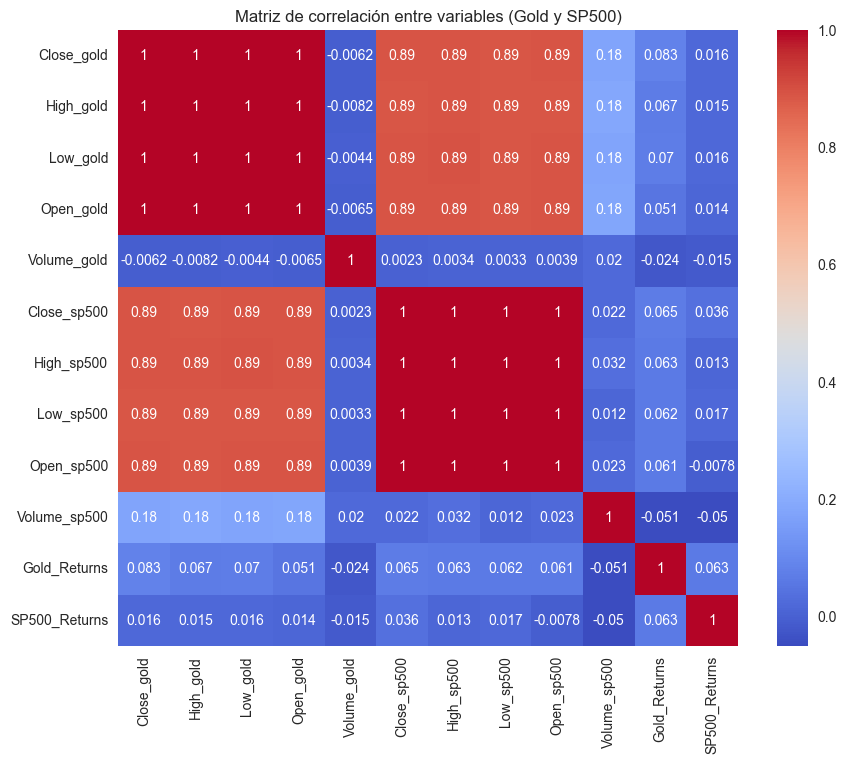

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(df_num.corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de correlación entre variables (Gold y SP500)")
plt.show()

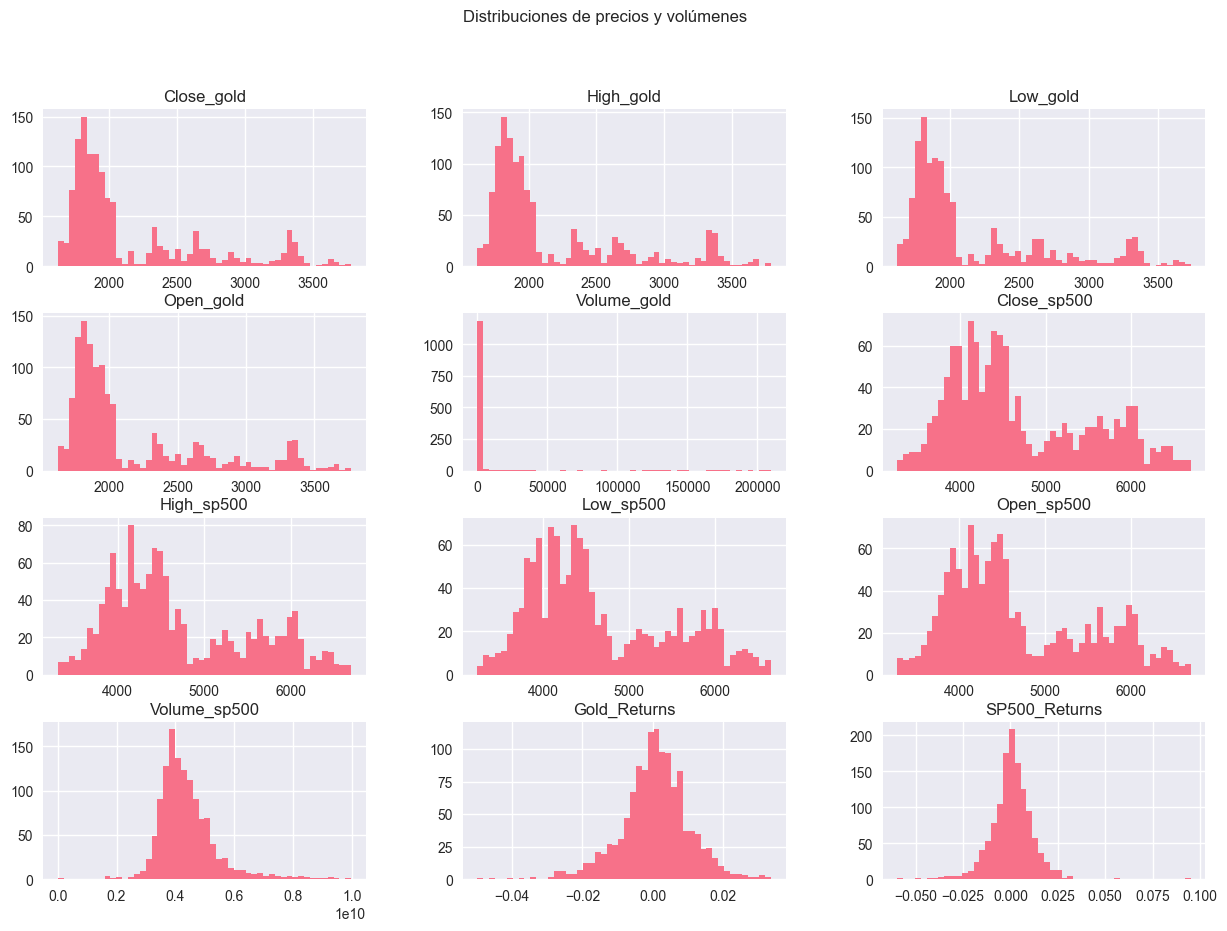

In [23]:
df_num.hist(bins=50, figsize=(15,10))
plt.suptitle("Distribuciones de precios y volúmenes")
plt.show()

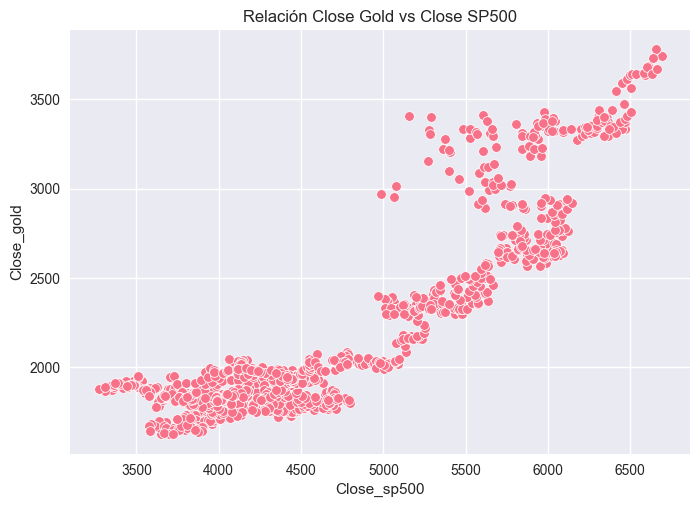

In [25]:
sns.scatterplot(x="Close_sp500", y="Close_gold", data=df_num)
plt.title("Relación Close Gold vs Close SP500")
plt.show()

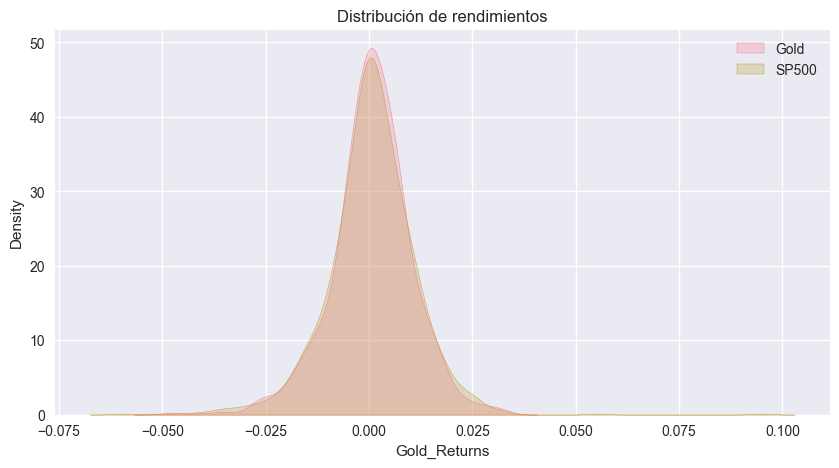

               Gold_Returns  SP500_Returns
Gold_Returns       1.000000       0.063219
SP500_Returns      0.063219       1.000000


In [26]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=df_num, x="Gold_Returns", shade=True, label="Gold")
sns.kdeplot(data=df_num, x="SP500_Returns", shade=True, label="SP500")
plt.title("Distribución de rendimientos")
plt.legend()
plt.show()

print(df_num[["Gold_Returns", "SP500_Returns"]].corr())

=== CORRELATION ANALYSIS ===
Price correlation: 0.8903
Returns correlation: 0.0632


ValueError: other must be a DataFrame or Series

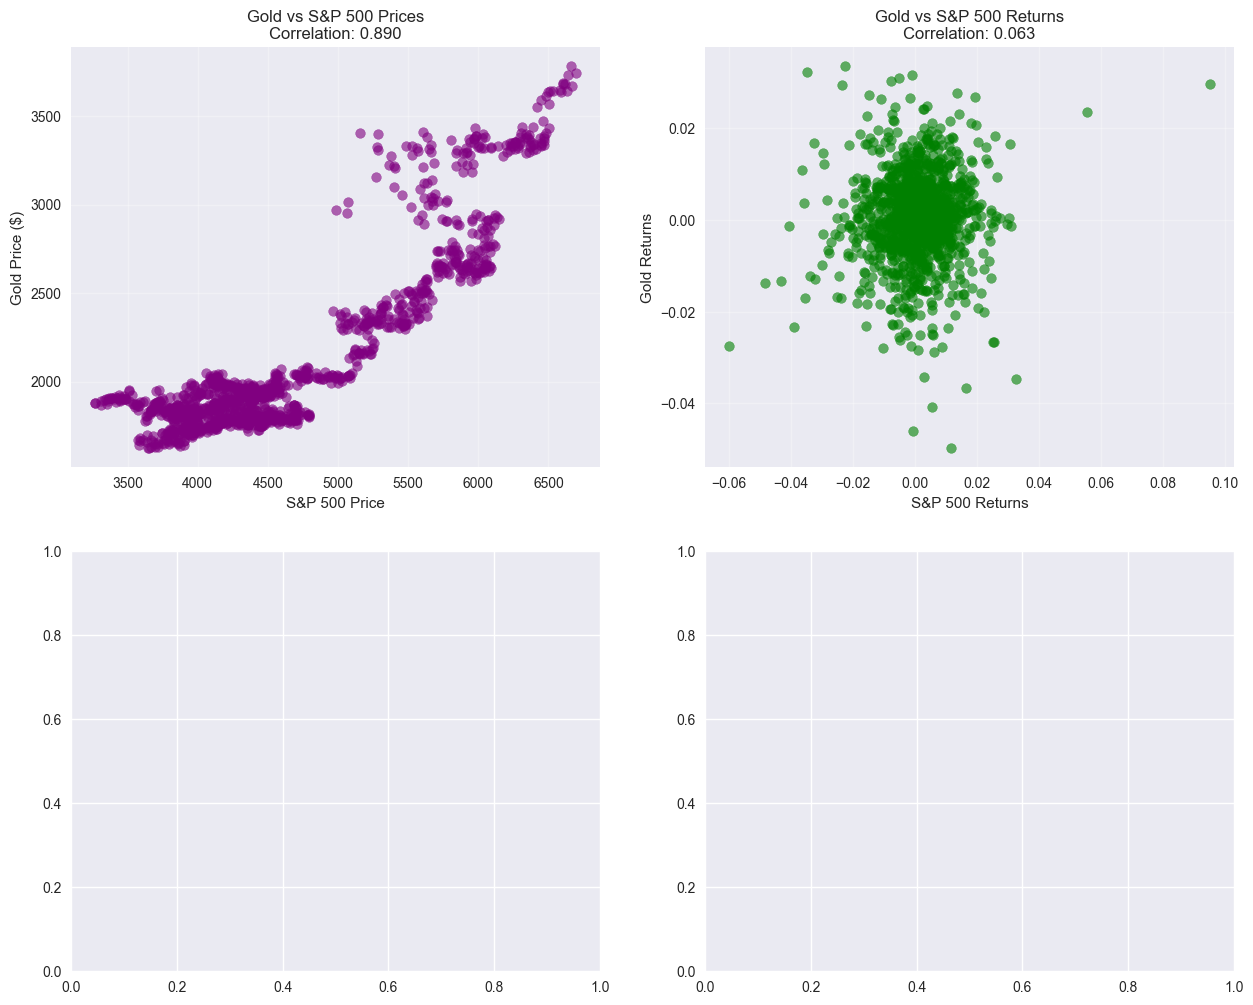

In [10]:
# # Correlation Analysis
# print("=== CORRELATION ANALYSIS ===")

# # Calculate correlations
# price_correlation = df['Close_gold'].corr(df['Close_sp500'])
# returns_correlation = df['Gold_Returns'].corr(df['SP500_Returns'])

# print(f"Price correlation: {price_correlation:.4f}")
# print(f"Returns correlation: {returns_correlation:.4f}")

# # Create correlation visualization
# fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# # Scatter plot: Gold vs S&P 500 prices
# axes[0, 0].scatter(df['Close_sp500'], df['Close_gold'], alpha=0.6, color='purple')
# axes[0, 0].set_xlabel('S&P 500 Price')
# axes[0, 0].set_ylabel('Gold Price ($)')
# axes[0, 0].set_title(f'Gold vs S&P 500 Prices\nCorrelation: {price_correlation:.3f}')
# axes[0, 0].grid(True, alpha=0.3)

# # Scatter plot: Returns
# axes[0, 1].scatter(df['SP500_Returns'], df['Gold_Returns'], alpha=0.6, color='green')
# axes[0, 1].set_xlabel('S&P 500 Returns')
# axes[0, 1].set_ylabel('Gold Returns')
# axes[0, 1].set_title(f'Gold vs S&P 500 Returns\nCorrelation: {returns_correlation:.3f}')
# axes[0, 1].grid(True, alpha=0.3)

# # Rolling correlation (30-day window)
# rolling_corr = df['Gold_Returns'].rolling(window=30).corr(df['SP500_Returns'].rolling(window=30))
# axes[1, 0].plot(df['Date'], rolling_corr, color='red', linewidth=2)
# axes[1, 0].set_title('30-Day Rolling Correlation')
# axes[1, 0].set_xlabel('Date')
# axes[1, 0].set_ylabel('Correlation')
# axes[1, 0].grid(True, alpha=0.3)
# axes[1, 0].axhline(y=0, color='black', linestyle='--', alpha=0.5)

# # Distribution of returns
# axes[1, 1].hist(df['Gold_Returns'].dropna(), bins=50, alpha=0.7, label='Gold', color='gold')
# axes[1, 1].hist(df['SP500_Returns'].dropna(), bins=50, alpha=0.7, label='S&P 500', color='blue')
# axes[1, 1].set_title('Distribution of Daily Returns')
# axes[1, 1].set_xlabel('Daily Returns')
# axes[1, 1].set_ylabel('Frequency')
# axes[1, 1].legend()
# axes[1, 1].grid(True, alpha=0.3)

# plt.tight_layout()
# plt.show()

# # Additional correlation insights
# print(f"\n=== CORRELATION INSIGHTS ===")
# print(f"Price correlation strength: {'Strong' if abs(price_correlation) > 0.7 else 'Moderate' if abs(price_correlation) > 0.3 else 'Weak'}")
# print(f"Returns correlation strength: {'Strong' if abs(returns_correlation) > 0.7 else 'Moderate' if abs(returns_correlation) > 0.3 else 'Weak'}")
# print(f"Average rolling correlation: {rolling_corr.mean():.4f}")
# print(f"Rolling correlation range: {rolling_corr.min():.4f} to {rolling_corr.max():.4f}")


In [ ]:
# # Volatility and Risk Analysis
# print("=== VOLATILITY & RISK ANALYSIS ===")

# # Calculate volatility metrics
# def calculate_volatility_metrics(returns, window=30):
#     """Calculate various volatility metrics"""
#     metrics = {}
    
#     # Rolling volatility
#     metrics['rolling_vol'] = returns.rolling(window=window).std()
    
#     # Annualized volatility
#     metrics['annualized_vol'] = returns.rolling(window=window).std() * np.sqrt(252)
    
#     # GARCH-like volatility (exponentially weighted)
#     metrics['ewm_vol'] = returns.ewm(span=window).std()
    
#     return metrics

# # Calculate volatility for both assets
# gold_vol = calculate_volatility_metrics(df['Gold_Returns'])
# sp500_vol = calculate_volatility_metrics(df['SP500_Returns'])

# # Risk metrics
# def calculate_risk_metrics(returns):
#     """Calculate risk metrics"""
#     metrics = {}
    
#     # Value at Risk (VaR) - 95% confidence
#     metrics['VaR_95'] = returns.quantile(0.05)
    
#     # Expected Shortfall (Conditional VaR)
#     metrics['ES_95'] = returns[returns <= metrics['VaR_95']].mean()
    
#     # Maximum Drawdown
#     cumulative = (1 + returns).cumprod()
#     rolling_max = cumulative.expanding().max()
#     drawdown = (cumulative - rolling_max) / rolling_max
#     metrics['max_drawdown'] = drawdown.min()
    
#     # Sharpe ratio (assuming risk-free rate = 0)
#     metrics['sharpe_ratio'] = returns.mean() / returns.std()
    
#     return metrics

# gold_risk = calculate_risk_metrics(df['Gold_Returns'].dropna())
# sp500_risk = calculate_risk_metrics(df['SP500_Returns'].dropna())

# # Create volatility visualization
# fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# # Rolling volatility comparison
# axes[0, 0].plot(df['Date'], gold_vol['rolling_vol'], label='Gold', color='gold', linewidth=2)
# axes[0, 0].plot(df['Date'], sp500_vol['rolling_vol'], label='S&P 500', color='blue', linewidth=2)
# axes[0, 0].set_title('30-Day Rolling Volatility', fontsize=14, fontweight='bold')
# axes[0, 0].set_xlabel('Date')
# axes[0, 0].set_ylabel('Volatility')
# axes[0, 0].legend()
# axes[0, 0].grid(True, alpha=0.3)

# # Volatility clustering
# axes[0, 1].scatter(df['Gold_Returns'].shift(1), df['Gold_Returns'], alpha=0.6, color='gold')
# axes[0, 1].set_title('Gold Volatility Clustering', fontsize=14, fontweight='bold')
# axes[0, 1].set_xlabel('Previous Day Return')
# axes[0, 1].set_ylabel('Current Day Return')
# axes[0, 1].grid(True, alpha=0.3)

# # Risk-return scatter
# axes[1, 0].scatter(df['Gold_Returns'].std(), df['Gold_Returns'].mean(), 
#                   color='gold', s=100, label='Gold', alpha=0.8)
# axes[1, 0].scatter(df['SP500_Returns'].std(), df['SP500_Returns'].mean(), 
#                   color='blue', s=100, label='S&P 500', alpha=0.8)
# axes[1, 0].set_title('Risk-Return Profile', fontsize=14, fontweight='bold')
# axes[1, 0].set_xlabel('Volatility (Risk)')
# axes[1, 0].set_ylabel('Average Return')
# axes[1, 0].legend()
# axes[1, 0].grid(True, alpha=0.3)

# # Drawdown analysis
# gold_cumulative = (1 + df['Gold_Returns']).cumprod()
# sp500_cumulative = (1 + df['SP500_Returns']).cumprod()

# gold_rolling_max = gold_cumulative.expanding().max()
# sp500_rolling_max = sp500_cumulative.expanding().max()

# gold_drawdown = (gold_cumulative - gold_rolling_max) / gold_rolling_max
# sp500_drawdown = (sp500_cumulative - sp500_rolling_max) / sp500_rolling_max

# axes[1, 1].fill_between(df['Date'], gold_drawdown, 0, alpha=0.7, color='gold', label='Gold')
# axes[1, 1].fill_between(df['Date'], sp500_drawdown, 0, alpha=0.7, color='blue', label='S&P 500')
# axes[1, 1].set_title('Drawdown Analysis', fontsize=14, fontweight='bold')
# axes[1, 1].set_xlabel('Date')
# axes[1, 1].set_ylabel('Drawdown')
# axes[1, 1].legend()
# axes[1, 1].grid(True, alpha=0.3)

# plt.tight_layout()
# plt.show()

# # Print risk metrics
# print("=== RISK METRICS COMPARISON ===")
# print(f"Gold VaR (95%): {gold_risk['VaR_95']:.4f} ({gold_risk['VaR_95']*100:.2f}%)")
# print(f"S&P 500 VaR (95%): {sp500_risk['VaR_95']:.4f} ({sp500_risk['VaR_95']*100:.2f}%)")
# print(f"\nGold Max Drawdown: {gold_risk['max_drawdown']:.4f} ({gold_risk['max_drawdown']*100:.2f}%)")
# print(f"S&P 500 Max Drawdown: {sp500_risk['max_drawdown']:.4f} ({sp500_risk['max_drawdown']*100:.2f}%)")
# print(f"\nGold Sharpe Ratio: {gold_risk['sharpe_ratio']:.4f}")
# print(f"S&P 500 Sharpe Ratio: {sp500_risk['sharpe_ratio']:.4f}")

# # Volatility comparison
# print(f"\n=== VOLATILITY COMPARISON ===")
# print(f"Gold average volatility: {df['Gold_Returns'].std():.4f} ({df['Gold_Returns'].std()*100:.2f}%)")
# print(f"S&P 500 average volatility: {df['SP500_Returns'].std():.4f} ({df['SP500_Returns'].std()*100:.2f}%)")
# print(f"Volatility ratio (Gold/S&P 500): {df['Gold_Returns'].std() / df['SP500_Returns'].std():.2f}")


In [ ]:
# # Predictive Modeling Insights and Recommendations
# print("=== PREDICTIVE MODELING INSIGHTS & RECOMMENDATIONS ===")

# # Feature importance analysis
# print("\n1. KEY INSIGHTS FOR GOLD PRICE PREDICTION:")
# print("=" * 50)

# # Analyze correlation with target (gold price)
# target_correlations = {}
# for col in modeling_features.columns:
#     if col not in ['Date', 'Close_gold', 'Close_sp500', 'Gold_Returns', 'SP500_Returns'] and modeling_features[col].dtype in ['float64', 'int64']:
#         corr = modeling_features[col].corr(modeling_features['Close_gold'])
#         if not pd.isna(corr):
#             target_correlations[col] = abs(corr)

# # Sort by correlation strength
# sorted_correlations = sorted(target_correlations.items(), key=lambda x: x[1], reverse=True)

# print("Top 10 features most correlated with Gold price:")
# for i, (feature, corr) in enumerate(sorted_correlations[:10]):
#     print(f"{i+1:2d}. {feature:<25} | Correlation: {corr:.4f}")

# print(f"\n2. MODELING RECOMMENDATIONS:")
# print("=" * 50)

# print("A. FEATURE ENGINEERING:")
# print("   • Use lag features (1-10 days) for both Gold and S&P 500")
# print("   • Include moving averages (5, 10, 20, 50 days)")
# print("   • Add technical indicators (RSI, volatility measures)")
# print("   • Create interaction features (price ratios, return ratios)")

# print("\nB. MODELING APPROACH:")
# print("   • Time series models: ARIMA, LSTM, Prophet")
# print("   • Machine learning: Random Forest, XGBoost, Neural Networks")
# print("   • Ensemble methods combining multiple approaches")

# print("\nC. DATA SPLITTING STRATEGY:")
# print("   • Use time-based splits (not random)")
# print("   • Train on historical data, test on recent data")
# print("   • Consider walk-forward validation")

# print("\nD. TARGET VARIABLE OPTIONS:")
# print("   • Direct price prediction: Close_gold")
# print("   • Return prediction: Gold_Returns")
# print("   • Direction prediction: Binary (up/down)")

# print(f"\n3. CORRELATION INSIGHTS:")
# print("=" * 50)
# print(f"• Gold-S&P 500 price correlation: {price_correlation:.4f}")
# print(f"• Gold-S&P 500 returns correlation: {returns_correlation:.4f}")
# print(f"• This suggests S&P 500 can be a useful predictor for Gold")

# print(f"\n4. VOLATILITY INSIGHTS:")
# print("=" * 50)
# print(f"• Gold volatility: {df['Gold_Returns'].std()*100:.2f}% daily")
# print(f"• S&P 500 volatility: {df['SP500_Returns'].std()*100:.2f}% daily")
# print(f"• Gold is {'more' if df['Gold_Returns'].std() > df['SP500_Returns'].std() else 'less'} volatile than S&P 500")

# print(f"\n5. RECOMMENDED NEXT STEPS:")
# print("=" * 50)
# print("1. Clean and prepare the modeling dataset")
# print("2. Implement time series cross-validation")
# print("3. Try multiple modeling approaches:")
# print("   - Linear regression with lag features")
# print("   - Random Forest for feature importance")
# print("   - LSTM for sequence modeling")
# print("   - Ensemble of multiple models")
# print("4. Evaluate models using appropriate metrics:")
# print("   - RMSE for price prediction")
# print("   - Direction accuracy for trading signals")
# print("   - Sharpe ratio for risk-adjusted returns")

# # Save the modeling dataset
# modeling_features.to_csv('../data/processed/modeling_dataset.csv', index=False)
# print(f"\n✅ Modeling dataset saved to: ../data/processed/modeling_dataset.csv")
# print(f"   Shape: {modeling_features.shape}")
# print(f"   Features: {len(feature_columns)}")
# print(f"   Date range: {modeling_features['Date'].min()} to {modeling_features['Date'].max()}")


In [ ]:
# # Technical Indicators and Lag Features for Modeling
# print("=== TECHNICAL INDICATORS & LAG FEATURES ===")

# # Create technical indicators
# def create_technical_indicators(df, price_col, window_sizes=[5, 10, 20, 50]):
#     """Create technical indicators for modeling"""
#     df_tech = df.copy()
    
#     # Moving averages
#     for window in window_sizes:
#         df_tech[f'MA_{window}'] = df_tech[price_col].rolling(window=window).mean()
#         df_tech[f'MA_{window}_ratio'] = df_tech[price_col] / df_tech[f'MA_{window}']
    
#     # Price momentum indicators
#     for lag in [1, 2, 3, 5, 10, 20]:
#         df_tech[f'lag_{lag}'] = df_tech[price_col].shift(lag)
#         df_tech[f'return_{lag}'] = df_tech[price_col].pct_change(lag)
#         df_tech[f'price_change_{lag}'] = df_tech[price_col] - df_tech[f'lag_{lag}']
    
#     # Volatility indicators
#     for window in [5, 10, 20]:
#         df_tech[f'volatility_{window}'] = df_tech[price_col].pct_change().rolling(window=window).std()
#         df_tech[f'high_low_ratio_{window}'] = df_tech[f'High_{price_col.split("_")[0]}'].rolling(window=window).max() / df_tech[f'Low_{price_col.split("_")[0]}'].rolling(window=window).min()
    
#     # RSI (Relative Strength Index)
#     delta = df_tech[price_col].diff()
#     gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
#     loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
#     rs = gain / loss
#     df_tech['RSI'] = 100 - (100 / (1 + rs))
    
#     return df_tech

# # Apply technical indicators to both datasets
# gold_with_indicators = create_technical_indicators(df, 'Close_gold')
# sp500_with_indicators = create_technical_indicators(df, 'Close_sp500')

# # Create lag features for S&P 500 to predict gold
# modeling_features = df.copy()

# # Add S&P 500 lag features (1-10 days)
# for lag in range(1, 11):
#     modeling_features[f'sp500_lag_{lag}'] = modeling_features['Close_sp500'].shift(lag)
#     modeling_features[f'sp500_return_lag_{lag}'] = modeling_features['SP500_Returns'].shift(lag)

# # Add gold lag features (1-10 days)
# for lag in range(1, 11):
#     modeling_features[f'gold_lag_{lag}'] = modeling_features['Close_gold'].shift(lag)
#     modeling_features[f'gold_return_lag_{lag}'] = modeling_features['Gold_Returns'].shift(lag)

# # Add technical indicators
# modeling_features = create_technical_indicators(modeling_features, 'Close_gold')
# modeling_features = create_technical_indicators(modeling_features, 'Close_sp500')

# # Add interaction features
# modeling_features['price_ratio'] = modeling_features['Close_gold'] / modeling_features['Close_sp500']
# modeling_features['return_ratio'] = modeling_features['Gold_Returns'] / modeling_features['SP500_Returns']

# print("Created technical indicators and lag features:")
# print(f"Total features: {len(modeling_features.columns)}")
# print(f"Sample of new features: {[col for col in modeling_features.columns if 'lag_' in col or 'MA_' in col][:10]}")

# # Display feature importance for modeling
# feature_columns = [col for col in modeling_features.columns if col not in ['Date', 'Close_gold', 'Close_sp500', 'Gold_Returns', 'SP500_Returns']]
# print(f"\nAvailable features for modeling: {len(feature_columns)}")
# print("Feature categories:")
# print("- Lag features (gold and S&P 500)")
# print("- Moving averages")
# print("- Technical indicators (RSI, volatility)")
# print("- Price ratios and interactions")
